<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/simpleNN_churn_modeling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 04th Nov, 2023
# Bank churn modeling dataset
# Experiments with NN and dropouts
# https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

In [1]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 2.1 Read Bank Customers churn data

path = "/gdrive/MyDrive/Colab_data_files/bank_customers_churn/"


In [5]:
# 2.2
data = pd.read_csv(path + "Churn_Modelling.csv")

In [6]:
# 2.2.1
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# 2.2.2
data.shape   # (10000, 14)

(10000, 14)

In [8]:
# 2.3 Pop out target
y = data.pop('Exited')

In [9]:
# 2.3.1
data.shape   # (10000,13)

(10000, 13)

In [10]:
# 3.0 Check NULL
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [11]:
# 3.1
data['Gender'] = data['Gender'].map({'Female' : 1, 'Male' : 0})

In [12]:
# 3.2
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
# 3.3
data['Geography'] = data['Geography'].map({'France' : 0, 'Spain' : 2, 'Germany' : 3})

In [14]:
# 3.4 Categorical features:
data[:2]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58


In [15]:
# 3.5
data['CustomerId'].duplicated().sum()

0

In [16]:
# 3.6
data = data.drop(columns = ['RowNumber','CustomerId', 'Surname'])

In [17]:
# 3.7
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [18]:
# 4.0
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [19]:
# 4.1
X_train.shape
X_test.shape

(7500, 10)

(2500, 10)

## Scaling

In [20]:
# 5.0
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [21]:
# 5.1
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model
Try the model first with dropouts commented and then dropouts uncommented.

In [75]:
# 6.0
model = tf.keras.Sequential()

In [76]:
# 6.1
model.add( tf.keras.layers.Input(shape = (10,) ))

In [77]:
# 6.2 Start
model.add(tf.keras.layers.Dense(40, activation = 'relu'))  # MAke it 5 and then 20 (not more or less)

In [61]:
# 6.2.1 Experiment with adding a dropout layer
#       but then increase number of units in Dense layer from 20 to 40
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [78]:
# 6.2.2
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [79]:
# 6.2.3
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [80]:
# 6.3 Experiment first with activation of sigmoid
#     and then no activation function
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))    # Keep sigmoid; then remove sigmoid

In [81]:
# 6.4 Model summary:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 40)                440       
                                                                 
 dense_20 (Dense)            (None, 20)                820       
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1481 (5.79 KB)
Trainable params: 1481 (5.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [82]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

## Fit model

In [55]:
# 7.0
# Name it history and history_dropout
# For two kinds of models:

history = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/70
235/235 [==============================] - 2s 3ms/step - loss: 0.5091 - acc: 0.7787 - val_loss: 0.4589 - val_acc: 0.7960
Epoch 2/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4398 - acc: 0.8111 - val_loss: 0.4374 - val_acc: 0.8020
Epoch 3/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4114 - acc: 0.8228 - val_loss: 0.4024 - val_acc: 0.8268
Epoch 4/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3835 - acc: 0.8396 - val_loss: 0.3781 - val_acc: 0.8388
Epoch 5/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3695 - acc: 0.8489 - val_loss: 0.3720 - val_acc: 0.8460
Epoch 6/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3634 - acc: 0.8495 - val_loss: 0.3633 - val_acc: 0.8488
Epoch 7/70
235/235 [==============================] - 1s 3ms/step - loss: 0.3575 - acc: 0.8533 - val_loss: 0.3596 - val_acc: 0.8492
Epoch 8/70
235/235 [==============================] - 1s 3ms/step - loss: 0.

In [83]:
# 7.0
# Name it history and history_dropout
# For two kinds of models:

history_dropout = model.fit(X_train,y_train,
                            epochs = 70,
                            validation_data = (X_test, y_test)
                            )

Epoch 1/70
235/235 [==============================] - 2s 4ms/step - loss: 0.5317 - acc: 0.7863 - val_loss: 0.5010 - val_acc: 0.7920
Epoch 2/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4817 - acc: 0.7977 - val_loss: 0.4684 - val_acc: 0.7920
Epoch 3/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4632 - acc: 0.7984 - val_loss: 0.4466 - val_acc: 0.7920
Epoch 4/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4453 - acc: 0.8019 - val_loss: 0.4219 - val_acc: 0.8000
Epoch 5/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4245 - acc: 0.8165 - val_loss: 0.4022 - val_acc: 0.8272
Epoch 6/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4175 - acc: 0.8199 - val_loss: 0.3866 - val_acc: 0.8348
Epoch 7/70
235/235 [==============================] - 1s 3ms/step - loss: 0.4044 - acc: 0.8291 - val_loss: 0.3807 - val_acc: 0.8376
Epoch 8/70
235/235 [==============================] - 1s 3ms/step - loss: 0.

In [84]:
# 7.1
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3573 - acc: 0.8500


[0.35732540488243103, 0.8500000238418579]

## Plot losses

In [34]:
# 7.1.1
type(history.history)

dict

In [35]:
# 7.1.2
history_dropout.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

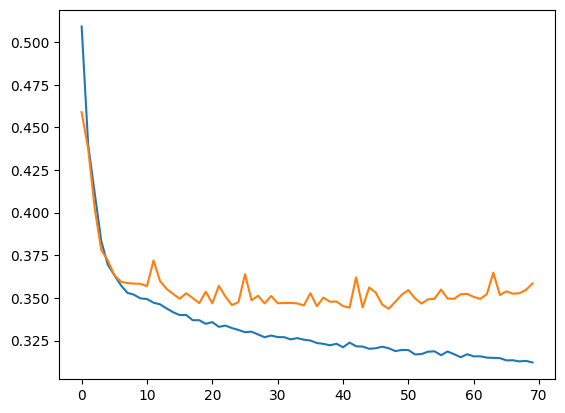

In [85]:
# 8.0 Plot losses without dropouts against epochs :
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)   # Training loss
plt.plot(val_loss)

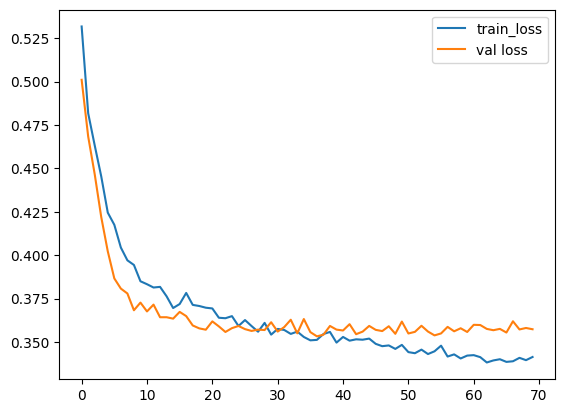

In [86]:
# 8.1 plot with dropouts
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [ ]:
######################### I am done #################